In [93]:
import psycopg2
import pandas as pd
from konlpy.tag import Kkma
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
import re

In [45]:
def select_command(table, keyword) :
    cts = ['재킷', '점퍼', '자켓', '잠바', '아우터', '집업', '코트', '롱패딩', '숏패딩', '패딩', '바람막이', '가디건', '플리스', '블레이저', '티셔츠', \
        '셔츠', '니트', '맨투맨', '후드', '블라우스', '팬츠', '바지', '슬랙스', '스커트', '치마', '원피스']

    #띄워쓰기 보정
    keyword = keyword.replace(' ', '')

    #keyword에 카테고리에 해당하는 단어가 있으면 분리해서 검색
    for ct in cts :
        if ct in keyword :
            i = keyword.find(ct)
            keyword2 = [keyword[:i], keyword[i:]]
    
    if type(keyword2) == list :
        command = 'select distinct title, date, url, hashtag from ' + table + " where title like '%" + keyword2[0] + "%" + keyword2[1] + "%'"
    else :
        command = 'select distinct title, date, url, hashtag from ' + table + " where title like '%" + keyword + "%'"
    
    return command

# 포스팅 수 가져오기

In [48]:
#postgresql 접속
conn_string = "host='localhost' dbname='postgres' user='postgres' password='admin'"
conn = psycopg2.connect(conn_string)
cur = conn.cursor()

#데이터 가져오기
cur.execute(select_command('yt_clothes', '겨울 아우터'))
conn.commit()
yy = cur.fetchall()

#DF화
yyy = pd.DataFrame(yy)
yyy.columns = ['title', 'date', 'url', 'hashtag']

#데이터 가져오기
cur.execute(select_command('view_clothes', '겨울 아우터'))
conn.commit()
vv = cur.fetchall()

#DF화
vvv = pd.DataFrame(vv)
vvv.columns = ['title', 'date', 'url', 'hashtag']

print('최근 1년 유튜브 게시 영상 수 :', yyy.shape[0])
print('최근 1년 네이버뷰 게시 글 수 :', vvv.shape[0])

#db 연결 종료
conn.cursor().close()
conn.close()

최근 1년 유튜브 게시 영상 수 : 214
최근 1년 네이버뷰 게시 글 수 : 112


In [50]:
yyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    214 non-null    object
 1   date     214 non-null    object
 2   url      214 non-null    object
 3   hashtag  214 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [128]:
yyy.head(50)

,title,date,url,hashtag
181,올 겨울 주목하면 좋을 아우터!? + 아이템 추천까지! 【패션토크】,2021-09-17,https://www.youtube.com/watch?v=BbcC5TFBxj4,
184,"옷장 속 26가지 가을/겨울 아우터 몽땅 입어보기🧥🍁 FW 자켓, 트렌치, 코트, ...",2021-09-21,https://www.youtube.com/watch?v=Ak081VyJ_9M,#가을아우터 #겨울아우터 #옷장털기
90,"가을,겨울 필수템 / 아우터를 활용한 가을코디 (feat. 남자 가디건 코디 bes...",2021-09-25,https://www.youtube.com/watch?v=eDFblRISYHA,
12,[가을 룩북🍁] FW 아우터 8종 패션하울 l 한섬 아우터 최대 85% 싸게 사는 ...,2021-09-28,https://www.youtube.com/watch?v=OMoaa4WTDWQ,#아우터 #패션하울 #한섬팩토리아울렛
144,따라하기 쉬운 가을&겨울 아우터 코디 6가지,2021-10-04,https://www.youtube.com/watch?v=UVRQCfDpKrI,
87,가을 겨울 아우터 딱 하나만 산다면 ‘파일럿 코트’를 추천합니다 [코트 증정 이벤트...,2021-10-07,https://www.youtube.com/watch?v=yQFncsHpoz0,#남자겨울코디 #남자겨울아우터 #헨리코튼
17,[옷장털기] 가을 겨울 아우터에 진심인 내 옷장 구경 올 사람 😋 | 11가지 자켓...,2021-10-07,https://www.youtube.com/watch?v=4dGAbJrKGiU,#옷장털기 #키작녀코디 #키작녀자켓
180,올 겨울 아우터는 이거 사!(1편),2021-10-07,https://www.youtube.com/watch?v=ef1eBDOcAes,
82,🏁구독자이벤트🏁 앞머리 탈색기념 힙한 스트릿브랜드 가을겨울코디 대방출!! 아우터 맛...,2021-10-15,https://www.youtube.com/watch?v=k8CXqhmnV0w,#노매뉴얼 #힙한스타일 #가을룩북
204,코트부터 패딩까지! 겨울 아우터가 고민된다면?! with.W컨셉,2021-10-20,https://www.youtube.com/watch?v=-BaHhfkTazA,#겨울아우터 #입어만볼게요


# 연간 포스팅 추이

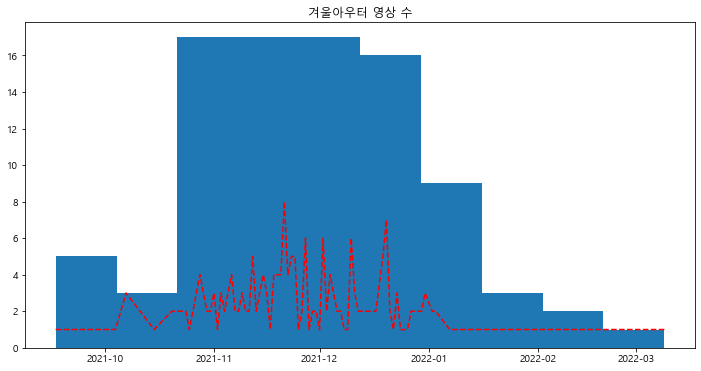

In [82]:
# datetime 타입으로 변환
yyy['date'] = pd.to_datetime(yyy['date'])
vvv['date'] = pd.to_datetime(vvv['date'])

#날짜순 정렬
yyy = yyy.sort_values(by = 'date')
vvv = vvv.sort_values(by = 'date')

#날짜별 count
y_day = yyy['date'].unique()
y_count = yyy['date'].value_counts().sort_index()
#v_day = vvv['date'].unique()
#v_count = vvv['date'].value_counts().sort_index()

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))
plt.title('겨울아우터 영상 수')

plt.hist(y_day)
plt.plot(y_day, y_count, 'r--')
#plt.plot(y_day, y_count, 'r--', v_day, v_count, 'b^')

# 제목 nlp

In [103]:
yyy['title']

181                올 겨울 주목하면 좋을 아우터!? + 아이템 추천까지! 【패션토크】
184    옷장 속 26가지 가을/겨울 아우터 몽땅 입어보기🧥🍁 FW 자켓, 트렌치, 코트, ...
90     가을,겨울 필수템 / 아우터를 활용한 가을코디 (feat. 남자 가디건 코디 bes...
12     [가을 룩북🍁] FW 아우터 8종 패션하울 l 한섬 아우터 최대 85% 싸게 사는 ...
144                             따라하기 쉬운 가을&겨울 아우터 코디 6가지
                             ...                        
211    한섬 팩토리 아울렛 | 겨울 아우터, 무스탕, 코트 70+30% | 타임, 마인, ...
67     Volg.일상 브이로그, 휘뚤 마뚤 겨울 아우터 lo61 퍼코트, 긴 겨울 나름의 ...
55     haul. 겨울 신상 아이템 하울 | 롱코트 러버가 추천하는 4가지 아우터 🧶 | ...
152    미국 살면 나이키 싸게 사냐구요? ( 겨울 아우터 부터 여름 원피스까지 나이키하울 ...
116    겨울과 봄 사이 패션하울🌷💖 인생 아우터, 니트, 신발, 원피스발견 | 에이블리, ...
Name: title, Length: 214, dtype: object

In [98]:
kkma = Kkma()

def rmEmoji(inputData):

    emoji_pattern = re.compile("["
        u"\U00010000-\U0010FFFF"  #BMP characters 이외
            "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', inputData) # no emoji


In [122]:
#불용어 읽어오기
stopwords = pd.read_csv("stopwords.txt")
stopwords = stopwords['word'].tolist()

#불용어제거 + 토큰화
tk = []
for sentence in tqdm(yyy['title']) :
    sentence = rmEmoji(sentence) # 이모티콘 제거
    tokenized_sentence = kkma.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tk.append(stopwords_removed_sentence)

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tk)

100%|██████████| 214/214 [00:10<00:00, 19.89it/s]


[['ㄹ',
  '겨울',
  '주목',
  '면',
  '좋',
  '아우터',
  '!',
  '?',
  '+',
  '아이템',
  '추천',
  '!',
  '【',
  '패션',
  '토크',
  '】'],
 ['옷장',
  '속',
  '26',
  '가지',
  '가을',
  '/',
  '겨울',
  '아우터',
  '몽땅',
  '입',
  '보',
  '기',
  'FW',
  '자켓',
  ',',
  '트렌치',
  ',',
  '코트',
  ',',
  '푸',
  '자켓',
  ',',
  '패딩',
  '!'],
 ['가을',
  ',',
  '겨울',
  '필수',
  '템',
  '/',
  '아우터',
  '활용',
  'ㄴ',
  '가을',
  '코디',
  '(',
  'feat',
  '.',
  '남자',
  '디',
  '건',
  '코디',
  'best',
  '20',
  ')']]

In [124]:
from collections import Counter
Counter(tokenizer.word_counts).most_common(15)


[(',', 350),
 ('겨울', 297),
 ('아우터', 252),
 ('룩', 151),
 ('|', 142),
 ('추천', 110),
 ('/', 104),
 ('코트', 101),
 ('코디', 97),
 ('ㄹ', 90),
 ('ㄴ', 86),
 ('패딩', 80),
 ('.', 80),
 ('북', 78),
 (')', 77)]

In [110]:
from konlpy.tag import Komoran
komoran = Komoran()

def rmEmoji(inputData):

    emoji_pattern = re.compile("["
        u"\U00010000-\U0010FFFF"  #BMP characters 이외
            "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', inputData) # no emoji


In [125]:
#불용어 읽어오기
stopwords = pd.read_csv("stopwords.txt")
stopwords = stopwords['word'].tolist()

#불용어제거 + 토큰화
tk = []
for sentence in tqdm(yyy['title']) :
    sentence = rmEmoji(sentence) # 이모티콘 제거
    tokenized_sentence = komoran.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tk.append(stopwords_removed_sentence)

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tk)

print(tokenizer.word_counts)

100%|██████████| 214/214 [00:00<00:00, 281.69it/s]


[['올',
  '겨울',
  '주목',
  '면',
  '좋',
  '아우',
  '터',
  '!',
  '?',
  '+',
  '아이템',
  '추천',
  '!',
  '【',
  '패션',
  '토크',
  '】'],
 ['옷장',
  '속',
  '26',
  '가지',
  '가을',
  '/',
  '겨울',
  '아우',
  '터',
  '몽땅',
  '입',
  '보',
  '기',
  'FW',
  '자켓,',
  '트렌치',
  ',',
  '코트',
  ',',
  '퍼자켓,',
  '패딩',
  '!'],
 ['가을',
  ',',
  '겨울',
  '필수템',
  '/',
  '아우',
  '터',
  '활용',
  'ㄴ',
  '가을',
  '코디',
  '(',
  'feat',
  '.',
  '남자',
  '가디건',
  '코디',
  'best',
  '20',
  ')']]

In [127]:
Counter(tokenizer.word_counts).most_common(15)

[('겨울', 309),
 (',', 281),
 ('터', 244),
 ('아우', 242),
 ('룩', 142),
 ('|', 111),
 ('추천', 101),
 ('하울', 91),
 ('코디', 87),
 ('.', 82),
 ('코트', 74),
 ('ㄴ', 72),
 ('북', 69),
 (')', 66),
 ('패딩', 65)]